# Data Exploration

## 🌐Cell 1: Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set visualization style
sns.set_theme(style="whitegrid")
plt.rcParams['font.sans-serif'] = ['Arial']  # Support English fonts
plt.rcParams['axes.unicode_minus'] = False

## 🌐Cell 2: Read Data

In [ ]:
# Set the data path
file_path = "../data/raw/RMBR4-2_export_test.csv"

# Read CSV file
if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    
    # Convert 'Time' column to datetime objects
    df['Time'] = pd.to_datetime(df['Time'])
    
    # Calculate elapsed seconds from the start, useful for regression
    df['Elapsed_Seconds'] = (df['Time'] - df['Time'].min()).dt.total_seconds()
    
    print(f"Data loaded successfully! Total {df.shape[0]} records.")
else:
    print("File not found!")

# Display first few rows
df.head()

Data loaded successfully! Total 39672 records.


,Trait,Axis #1,Axis #2,Axis #3,Axis #4,Axis #5,Axis #6,Axis #7,Axis #8,Axis #9,Axis #10,Axis #11,Axis #12,Axis #13,Axis #14,Time,Elapsed_Seconds
0,current,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-17 12:18:23.660000+00:00,0.000
1,current,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-17 12:18:25.472000+00:00,1.812
2,current,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-17 12:18:27.348000+00:00,3.688
3,current,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-17 12:18:29.222000+00:00,5.562
4,current,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-17 12:18:31.117000+00:00,7.457


## 🌐Cell 3:Information Check & Data Exploration

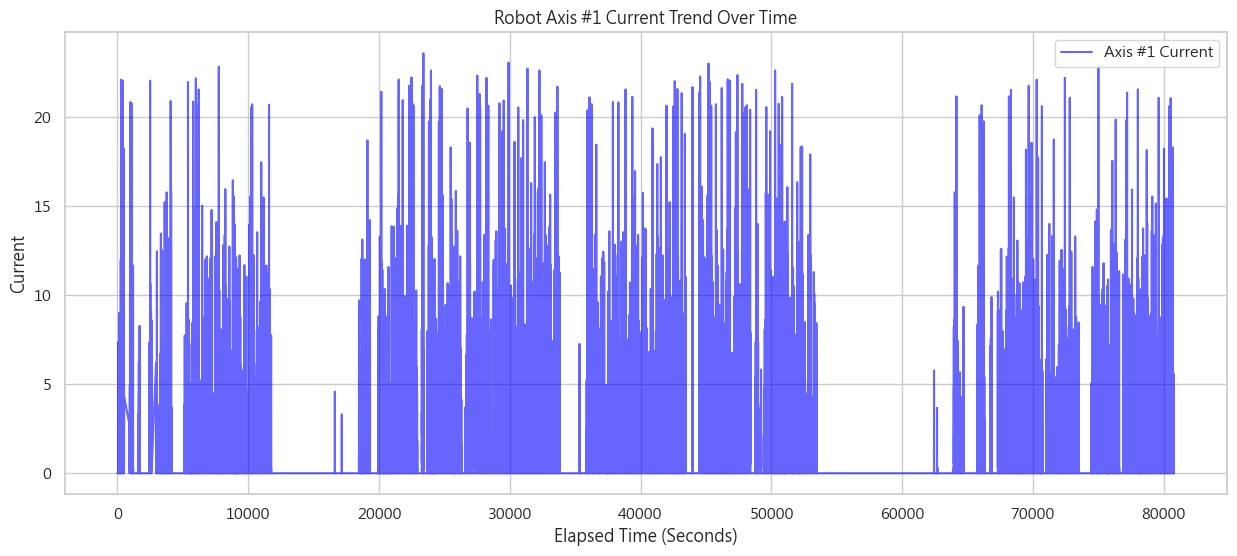

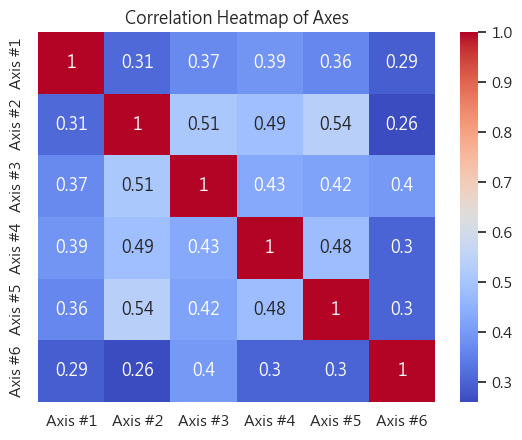

In [3]:
# Plot Axis #1 Current over time
plt.figure(figsize=(15, 6))
plt.plot(df['Elapsed_Seconds'], df['Axis #1'], label='Axis #1 Current', color='blue', alpha=0.6)

plt.title("Robot Axis #1 Current Trend Over Time")
plt.xlabel("Elapsed Time (Seconds)")
plt.ylabel("Current")
plt.legend()
plt.show()

# Check correlation between different axes
correlation_matrix = df[['Axis #1', 'Axis #2', 'Axis #3', 'Axis #4', 'Axis #5', 'Axis #6']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Axes")
plt.show()

## 🌐Cell 4: Data Cleaning & Transformation

Handling Missing Values & Outliers, Feature Engineering, Normalization/Standardization

### Why Smooth the Data?

- Filter Noise: Sensor readings often contain random fluctuations due to electromagnetic interference or instantaneous load changes; smoothing filters out this non-authentic noise.

- Capture Long-term Trends: Linear regression benefits from focusing on long-term degradation patterns instead of short-term spikes.

- Prevent Overfitting: Smoothing avoids teaching the model to fit meaningless outliers, improving prediction stability.

### Principles of Smoothing

- Moving Average: Uses a sliding window to compute the mean of recent data points and reduces short-term variability.

- Calculation Method: Each smoothed point is the average of neighboring observations, producing a continuous, smoother curve.

- Window Size: Larger windows produce smoother curves but increase lag in responding to real changes. Choose the window size based on data frequency and domain knowledge.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_10656\3902481136.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Axis1_Smooth'] = df_cleaned['Axis #1'].rolling(window=50).mean()
C:\Users\Usuario\AppData\Local\Temp\ipykernel_10656\3902481136.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df_cleaned.fillna(method='bfill')


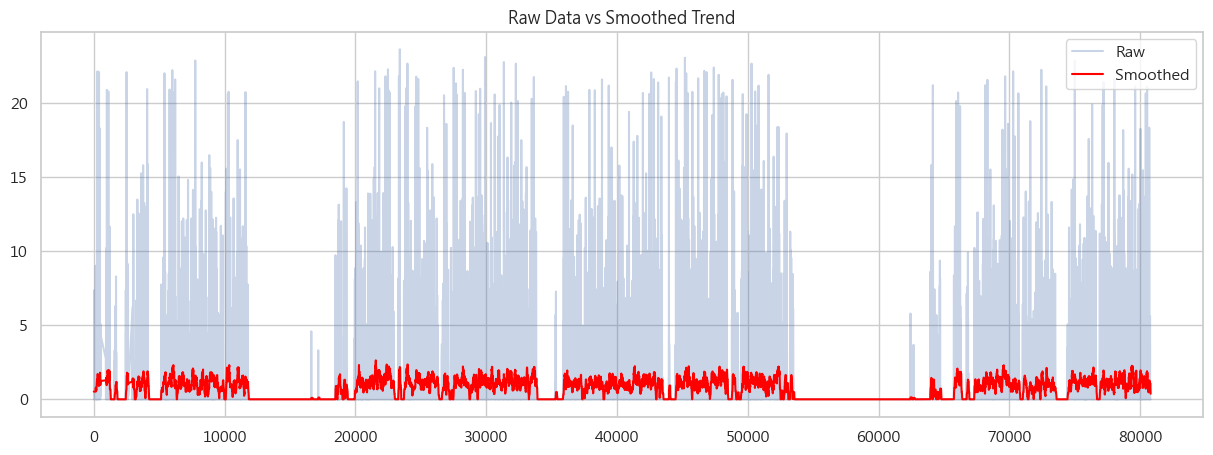

In [ ]:
# Drop empty columns (e.g., Axis 9-14)
df_cleaned = df.dropna(axis=1, how='all')

# Feature Engineering: Rolling Average
# window=50, can be adjusted based on data frequency
df_cleaned['Axis1_Smooth'] = df_cleaned['Axis #1'].rolling(window=50).mean()

# Fill NaNs created by rolling window
df_cleaned = df_cleaned.fillna(method='bfill')

# Visualize smoothed trend
plt.figure(figsize=(15, 5))
plt.plot(df_cleaned['Elapsed_Seconds'], df_cleaned['Axis #1'], alpha=0.3, label='Raw')
plt.plot(df_cleaned['Elapsed_Seconds'], df_cleaned['Axis1_Smooth'], color='red', label='Smoothed')
plt.title("Raw Data vs Smoothed Trend")
plt.legend()
plt.show()

In [ ]:
# Save the cleaned and processed data to a CSV file
processed_file_path = "../data/processed/cleaned_data.csv"
df_cleaned.to_csv(processed_file_path, index=False)
print(f"✅ Cleaned data saved to {processed_file_path}")

✅ Cleaned data saved to ../data/processed/cleaned_data.csv
